Double field inflation

$V(\phi,\chi)=\frac{1}{2}m_\phi\phi^2+\frac{1}{2}m_\chi\chi^2$

flat FRW universe:

$ds^2=-dt^2+a^2(t)dx^2$

Equation of motion:

$\ddot\phi+3H\dot\phi+V_{,\phi}=0$

$\ddot\chi+3H\dot\phi+V_{,\chi}=0$

Friedman equation:

$H^2=\frac{1}{3M_p}\left[\frac{\dot\phi}{2}+\frac{\dot\chi}{2}+V\right]$
$\dot H=-\frac{1}{2M_p}\left[\dot\phi^2+\dot\chi^2\right]$

At this point, we can solve equations and obtain trajectory. But in order to allow e-folds and scale factor to appear naturally, we need to redefine these variables, which will facilitate our subsequent processing of the power spectrum. Of course, it is more natural to use $\phi'$ directly, but it is not simple to continue using this method in power spectrum equations.

$T=t\cdot m_p\cdot S\qquad x=\frac{\phi}{m_p}\qquad x2=\frac{\chi}{m_p}$

$y=\frac{\dot\phi}{m_p^2}\frac{1}{S}\qquad y2=\frac{\dot\chi}{m_p^2}\frac{1}{S}\qquad z=\frac{H}{m_p}\frac{1}{S}\qquad A=a\cdot m_p\cdot S$

S defines one unit of time and $m_p$ is Plank mass. We will not mention them again in this article and will directly set them to 1. Equations become:

$\frac{dx}{dT}=y\qquad \frac{dx2}{dT}=y2$

$\frac{dy}{dT}=-3zy-V_\phi$

$\frac{dy2}{dT}=-3zy2-V_\chi$

$\frac{dz}{dT}=-\frac{1}{2}(y^2+y2^2)\qquad \frac{dA}{dT}=Az$

Note that in the above equation, we consider $b(\phi)=0$. and $V_\phi=m_\phi^2 \phi$, $V_\chi=m_\chi^2 \chi$

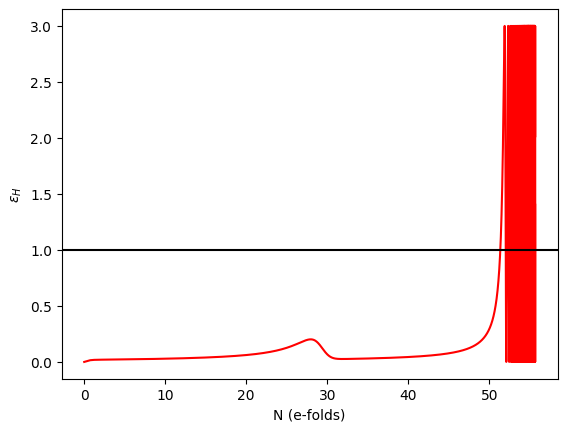

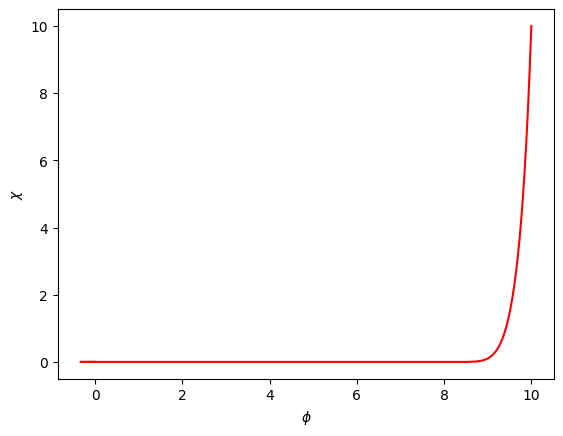

In [16]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

S =1  # for scaling time(will not mention later)
     

### initial conditions for the given system
mphi=1
mchi=6
xi = 10 # initial value of phi
x2i=10#chi
yi = 0# phi velocit(phi_dot)(It is best not to set it to 0, because when calculating isocurvature, the denominator may be 0, causing trouble.)
y2i=0#chi_dot
zi = np.sqrt((yi**2+y2i**2)/6 + (mphi**2*xi**2+mchi**2*x2i**2)/(6*S**2)) # initial value of hubble constant , note this is only for double inflation, if consider other potential, please change V.
Ai = 1e-3 # initial value of scale factor


# the system of differential equations to be solved
def sys(var, T):
    [x,x2,y,y2, z, A] = var

    # Note that all derivatives are taken wrt the scaled, dimenstionless cosmic time T

    dxdT = y
    dx2dT=y2
    dydT = -3*z*y - (mphi**2)*x/S**2
    dy2dT=-3*z*y2-(mchi**2)*x2/S**2
    dzdT = -0.5*(y**2+y2**2)
    dAdT = A*z
    
    return [dxdT,dx2dT,dydT,dy2dT,dzdT,dAdT]

T = np.linspace(0, 1000, 100000)


# invoking the ODE solver
sol = odeint(sys, [xi,x2i,yi,y2i,zi,Ai], T, rtol=3e-14, atol=2e-35, mxstep=900000000)
x,x2, y,y2, z, A = np.transpose(sol)
phi,chi,phidot,chidot,H = x,x2,y*S,y2*S,z*S



N = np.log(A/Ai) # number of e-folds of expansion elapsed
#Nt = 51.5213 # number of e-folds elapsed when inflation ends (value needs to be fixed from the behaviour of epsH)
#Ne = Nt - N # number of e-folds of expansion remaining before the end of inflation


## slow-roll parameters
epsH = 1/2*(phidot**2+chidot**2)/(z**2) # indicated whether the system is in a state of inflation
Hdot=-1/2*(phidot**2+chidot**2)


plt.plot(N,epsH, 'r')
plt.axhline(1, color='black')
plt.xlabel('N (e-folds)')
plt.ylabel(r'$\epsilon_H$')
plt.show()

plt.plot(phi,chi, 'r')
plt.xlabel(r'$\phi$')
plt.ylabel(r'$\chi$')
plt.show()

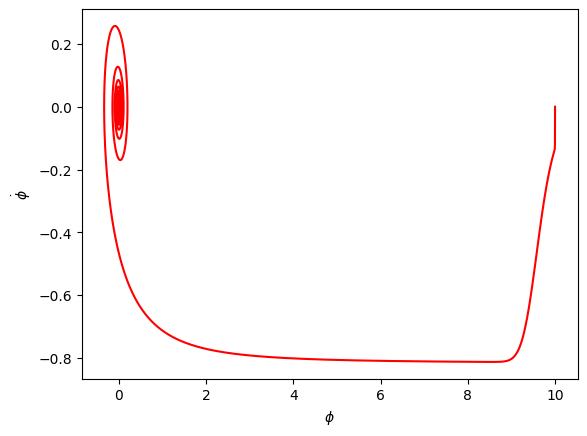

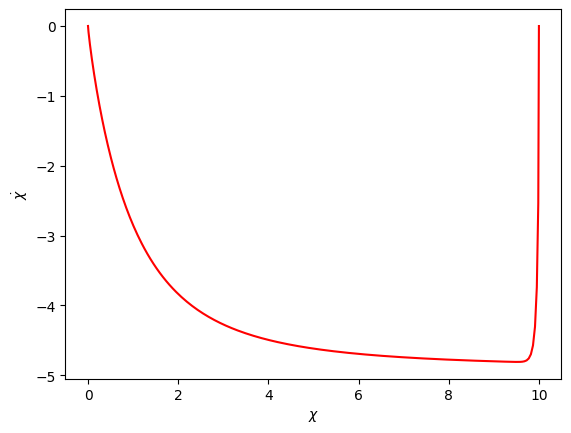

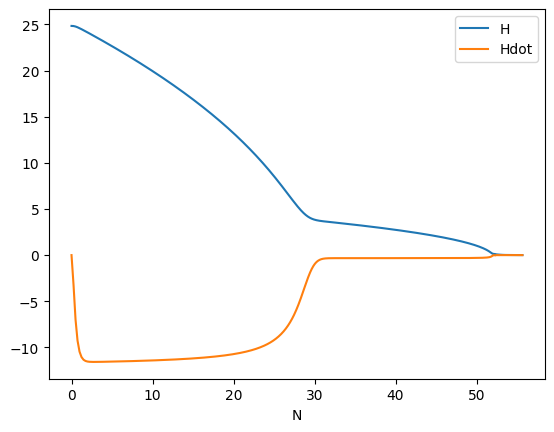

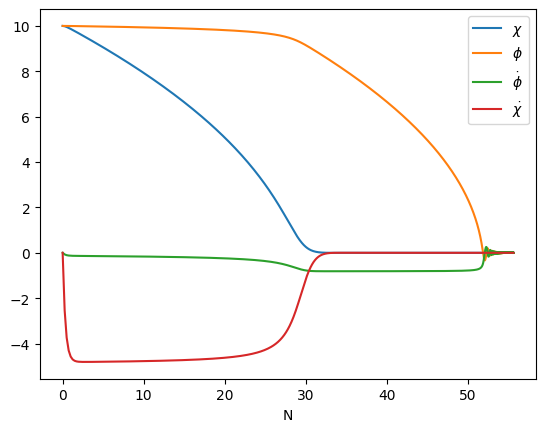

In [17]:
plt.plot(phi,phidot, 'r')
plt.xlabel(r'$\phi$')
plt.ylabel(r'$\dot\phi$')
plt.show()
plt.plot(chi,chidot, 'r')
plt.xlabel(r'$\chi$')
plt.ylabel(r'$\dot\chi$')
plt.show()
plt.figure()
plt.plot(N, z, label='H')
plt.plot(N, Hdot, label='Hdot')
plt.legend()
plt.xlabel('N')
plt.show()
plt.figure()
plt.plot(N, chi, label=r'$\chi$')
plt.plot(N, phi, label=r'$\phi$')
plt.plot(N, phidot, label=r'$\dot\phi $')
plt.plot(N, chidot, label=r'$\dot\chi $')
plt.legend()
plt.xlabel('N')
plt.show()

The N value when $\epsilon_H=1$

In [18]:
index_of_inflation_end = np.argmin(np.abs(epsH - 1))
    
N_value=N[index_of_inflation_end]

print(f'The end of inflation: N= {N_value}')

The end of inflation: N= 53.849613115073794


#########################################################################################################



############################################################################################################




Let's  use e-fold N

$\dot\phi=\frac{d}{dt}\phi=\frac{d}{dN}\frac{dN}{dt}\phi=H\phi'$

$\ddot\phi=\frac{d}{dt}(H\phi')=HH'\phi+H^2\phi''$

Then the equation of motion:

$\phi''=-(3+\frac{H'}{H})\phi'-\frac{V_\phi}{H^2}=-[3-\frac{1}{2}(\phi'^2+\chi'^2)]\phi'-\frac{m_\phi^2\phi}{H^2}$

$\chi''=-(3+\frac{H'}{H})\chi'-\frac{V_\chi}{H^2}=-[3-\frac{1}{2}(\phi'^2+\chi'^2)]\chi'-\frac{m_\chi^2\chi}{H^2}$

$H'=\frac{\dot H}{H}=-\frac{1}{2}H(\phi'^2+\chi'^2)$

$a'=\frac{d a}{d lna}=a$

Then:

$\frac{dx}{dN}=y$

$\frac{dx2}{dN}=y2$

$\frac{dy}{dN}=-[3-\frac{1}{2}(y^2+y2^2)]y - \frac{m_\phi^2x}{z^2}$

$\frac{dy2}{dN}=-[3-\frac{1}{2}(y^2+y2^2)]y2 - \frac{m_\chi^2x2}{z^2}$

$\frac{dz}{dT}=-\frac{1}{2}zy^2$

$\frac{dA}{dT}=A$

The figures look strange because we are drawing $\phi$ and $\phi '$. But this is correct.  When we use  $\dot\phi$, everything is perfect.

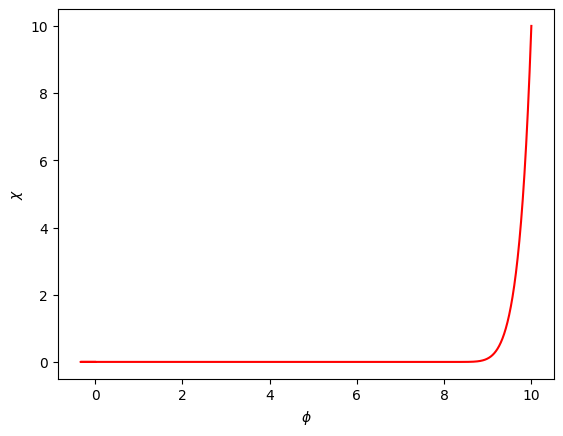

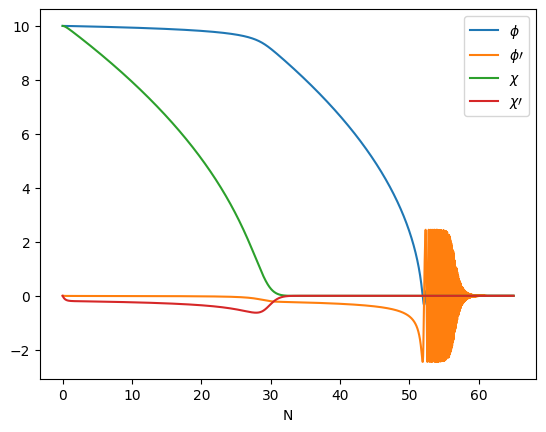

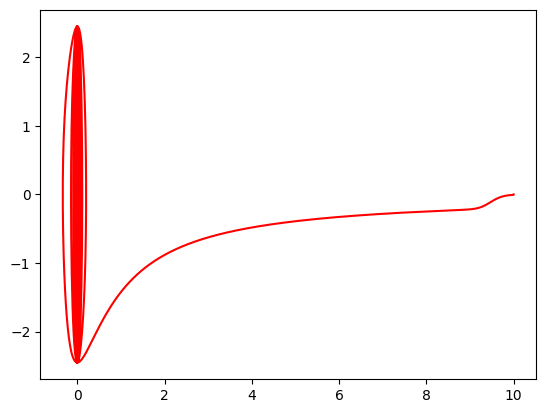

In [50]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
S=1
m_p = 1 
mphi = 1 * m_p
mchi=6*mphi


xi = 10 # initial value of phi
x2i=10#chi
yi = 0# phi velocit(phi_dot)(It is best not to set it to 0, because when calculating isocurvature, the denominator may be 0, causing trouble.)
y2i=0#chi_dot
zi = np.sqrt((yi**2+y2i**2)/6 + (mphi**2*xi**2+mchi**2*x2i**2)/(6*S**2)) # initial value of hubble constant , note this is only for double inflation, if consider other potential, please change V.
Ai = 1e-3 # initial value of scale factor

def sys(t, var):
    x,x2, y,y2, z, A = var
    dxdN = y
    dx2dN=y2
    dydN = -(3 - 0.5 * (y**2+y2**2)) * y - mphi**2 * x / (z**2)
    dy2dN = -(3 - 0.5 * (y**2+y2**2)) * y2 - mchi**2 * x2 / (z**2)
    dzdN = -0.5 * z * (y**2+y2**2)
    dAdN = A
    return [dxdN,dx2dN, dydN,dy2dN, dzdN, dAdN]

N = np.linspace(0, 65, 10000)  # Time points where solution is needed

# invoking the ODE solver
sol = solve_ivp(sys, [N[0], N[-1]], [xi,x2i, yi,y2i, zi, Ai], t_eval=N, rtol=1e-8, atol=1e-10, method='RK45')
t = sol.t
x,x2, y,y2, z, A = sol.y
phi,chi,phi_N,chi_N, H = x,x2, y,y2, z

plt.plot(phi, chi, 'r')
plt.xlabel(r'$\phi$')
plt.ylabel(r'$\chi $')
plt.show()

plt.plot(N, phi, label=r'$\phi$')
plt.plot(N, phi_N, label=r'$\phi\prime$')
plt.plot(N, chi, label=r'$\chi$')
plt.plot(N, chi_N, label=r'$\chi\prime$')
plt.legend()
plt.xlabel('N')
plt.show()

plt.plot(phi, phi_N, 'r')
plt.show()


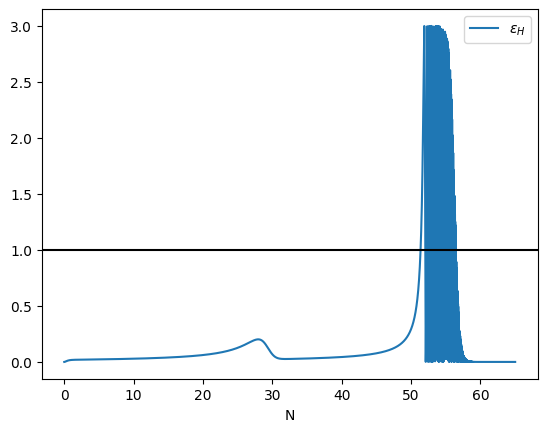

C:\Users\Administrator\AppData\Local\Temp\ipykernel_1676\1004764454.py:8: RuntimeWarning: divide by zero encountered in divide
  eta=eps+1/(2*eps)*(phi_N*(-(3 - 0.5 * (phi_N**2+chi_N**2)) * phi_N - mphi**2 * phi / (H**2))+chi_N*(-(3 - 0.5 * (phi_N**2+chi_N**2)) * phi_N - mchi**2 * chi / (H**2)))
C:\Users\Administrator\AppData\Local\Temp\ipykernel_1676\1004764454.py:8: RuntimeWarning: invalid value encountered in multiply
  eta=eps+1/(2*eps)*(phi_N*(-(3 - 0.5 * (phi_N**2+chi_N**2)) * phi_N - mphi**2 * phi / (H**2))+chi_N*(-(3 - 0.5 * (phi_N**2+chi_N**2)) * phi_N - mchi**2 * chi / (H**2)))


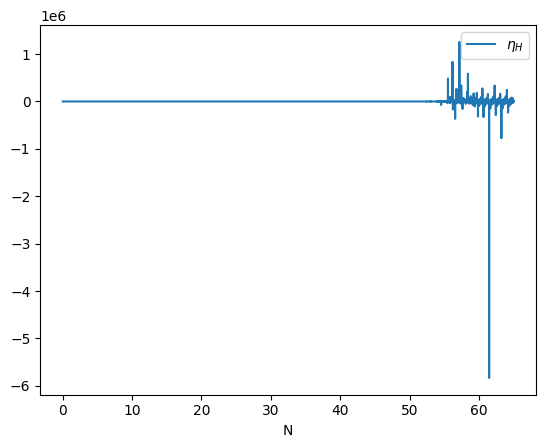

In [54]:
eps=0.5*(phi_N**2+chi_N**2)

plt.plot(N, eps, label=r'$\epsilon_H$')
plt.axhline(1, color='black')
plt.legend()
plt.xlabel('N')
plt.show()
##this is eta_H, because we set \phi_N=0, The denominator is zero, which may cause some issues,  the figure can still be provided.

# eta=eps+1/(2*eps)*(phi_N*(-(3 - 0.5 * (phi_N**2+chi_N**2)) * phi_N - mphi**2 * phi / (H**2))+chi_N*(-(3 - 0.5 * (phi_N**2+chi_N**2)) * phi_N - mchi**2 * chi / (H**2)))
# plt.plot(N, eta, label=r'$\eta_H $')
# plt.legend()
# plt.xlabel('N')
# plt.show()

In [53]:
index_of_inflation_end = np.argmin(np.abs(eps - 1))
    
N_value=N[index_of_inflation_end]

print(f'The end of inflation: N= {N_value}')

The end of inflation: N= 51.36163616361636
